In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
msp_df = pd.read_csv(list(Path('outputs/cifar10_wrn_pretrained').glob("msp*.csv"))[0])
# msp_df = msp_df.drop(columns=['auroc_std', 'aupr_std', 'fpr_std'])
msp_df['method'] = 'msp'

In [3]:
pNML_df = pd.read_csv(list(Path('outputs/cifar10_wrn_pretrained').glob("pNML*.csv"))[0])
# pNML_df = pNML_df.drop(columns=['auroc_std', 'aupr_std', 'fpr_std'])
pNML_df['method'] = 'pNML'

In [4]:
odin_outputs = list(Path('outputs/cifar10_wrn_pretrained').glob("odin*.csv"))
odin_measures = [pd.read_csv(p)[["auroc", "aupr", "fpr"]].mean() for p in odin_outputs]
odin_measures = pd.concat(odin_measures, axis=1).T
odin_measures['final'] = odin_measures['auroc'] + odin_measures['aupr'] + (100 - odin_measures['fpr'])*2
best_odin_run = odin_outputs[odin_measures['final'].argmax(axis=0)]
print("Best param: ", best_odin_run)
odin_df = pd.read_csv(best_odin_run)
# odin_df = odin_df.drop(columns=['auroc_std', 'aupr_std', 'fpr_std'])
odin_df['method'] = 'odin'

Best param:  outputs/cifar10_wrn_pretrained/odin_T=10.0_noise=0.002_cifar10_wrn_pretrained.csv


In [5]:
energy_df = pd.read_csv(list(Path('outputs/cifar10_wrn_pretrained').glob("energy*.csv"))[0])
# energy_df = energy_df.drop(columns=['auroc_std', 'aupr_std', 'fpr_std'])
energy_df['method'] = 'energy'

In [6]:
mahalanobis_outputs = list(Path('outputs/cifar10_wrn_pretrained').glob("mahalanobis*.csv"))
mahalanobis_measures = [pd.read_csv(p)[["auroc", "aupr", "fpr"]].mean() for p in mahalanobis_outputs]
mahalanobis_measures = pd.concat(mahalanobis_measures, axis=1).T
mahalanobis_measures['final'] = mahalanobis_measures['auroc'] + mahalanobis_measures['aupr'] + (100 - mahalanobis_measures['fpr'])*2
best_mahalanobis_run = mahalanobis_outputs[mahalanobis_measures['final'].argmax(axis=0)]
print("Best param: ", best_mahalanobis_run)
mahalanobis_df = pd.read_csv(best_mahalanobis_run)
# mahalanobis_df = mahalanobis_df.drop(columns=['auroc_std', 'aupr_std', 'fpr_std'])
mahalanobis_df['method'] = 'mahalanobis'

Best param:  outputs/cifar10_wrn_pretrained/mahalanobis_noise=0.002_layerindex=0_cifar10_wrn_pretrained.csv


In [11]:
df = pd.concat([msp_df, odin_df, energy_df, mahalanobis_df, pNML_df], ignore_index=True)

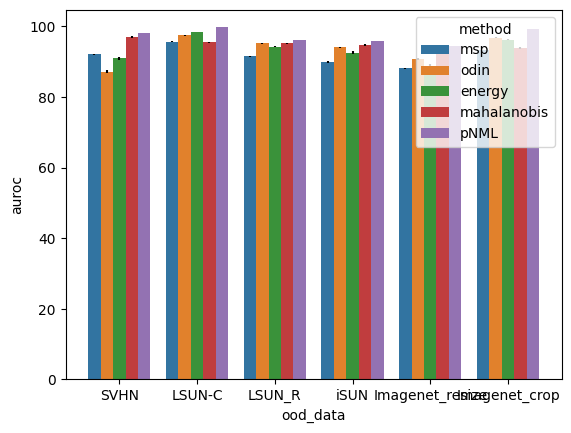

In [12]:
plt.figure()
ax = sns.barplot(data=df, x='ood_data', y='auroc', hue='method')
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=df["auroc_std"], fmt="none", c="k")
plt.show()

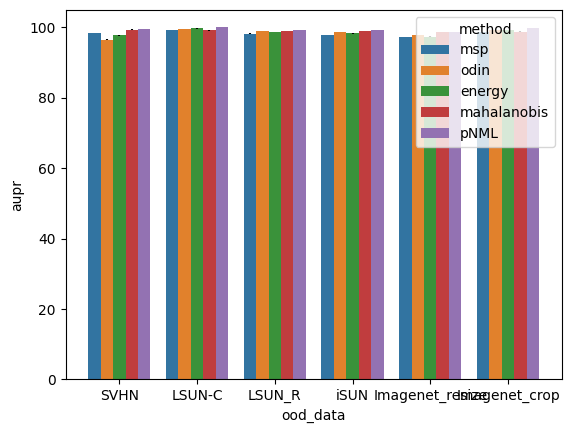

In [13]:
plt.figure()
ax = sns.barplot(data=df, x='ood_data', y='aupr', hue='method')
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=df["aupr_std"], fmt="none", c="k")
plt.show()

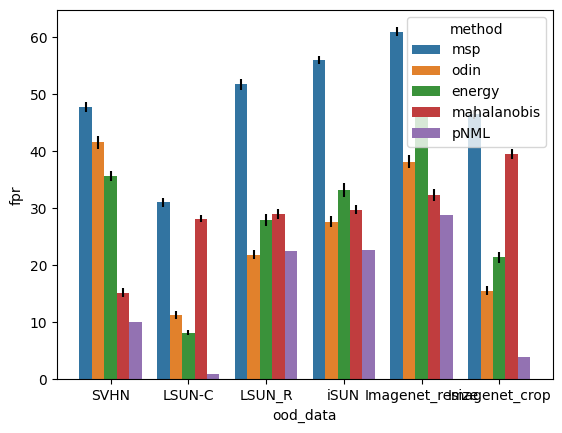

In [14]:
plt.figure()
ax = sns.barplot(data=df, x='ood_data', y='fpr', hue='method')
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=df["fpr_std"], fmt="none", c="k")
plt.show()